# Radargram Stripe De-noising

## Introduction

Echo-sounding is a common technique used in order to gain insight into the subsurface structure of a region of interest. In this technique, radio waves are sent through the ground, with the intensity of the response being recorded. Each pulse generates a wave akin to this:

![image](pulse.png)

In this diagram, the y-axis represents the amplitude of the return wave from the pulse and the y-axis represents time. This combination allows for a better picture of the subsurface environment to be established. Then, assuming these pulses are being sent out by a moving platform, these pulses can be concatenated horizontally in order to create a radargram, which resembles the following, created using the NumPy, PIL and netCDF4 libraries. 

In [6]:
import netCDF4 as nc
import numpy as np
from PIL import Image

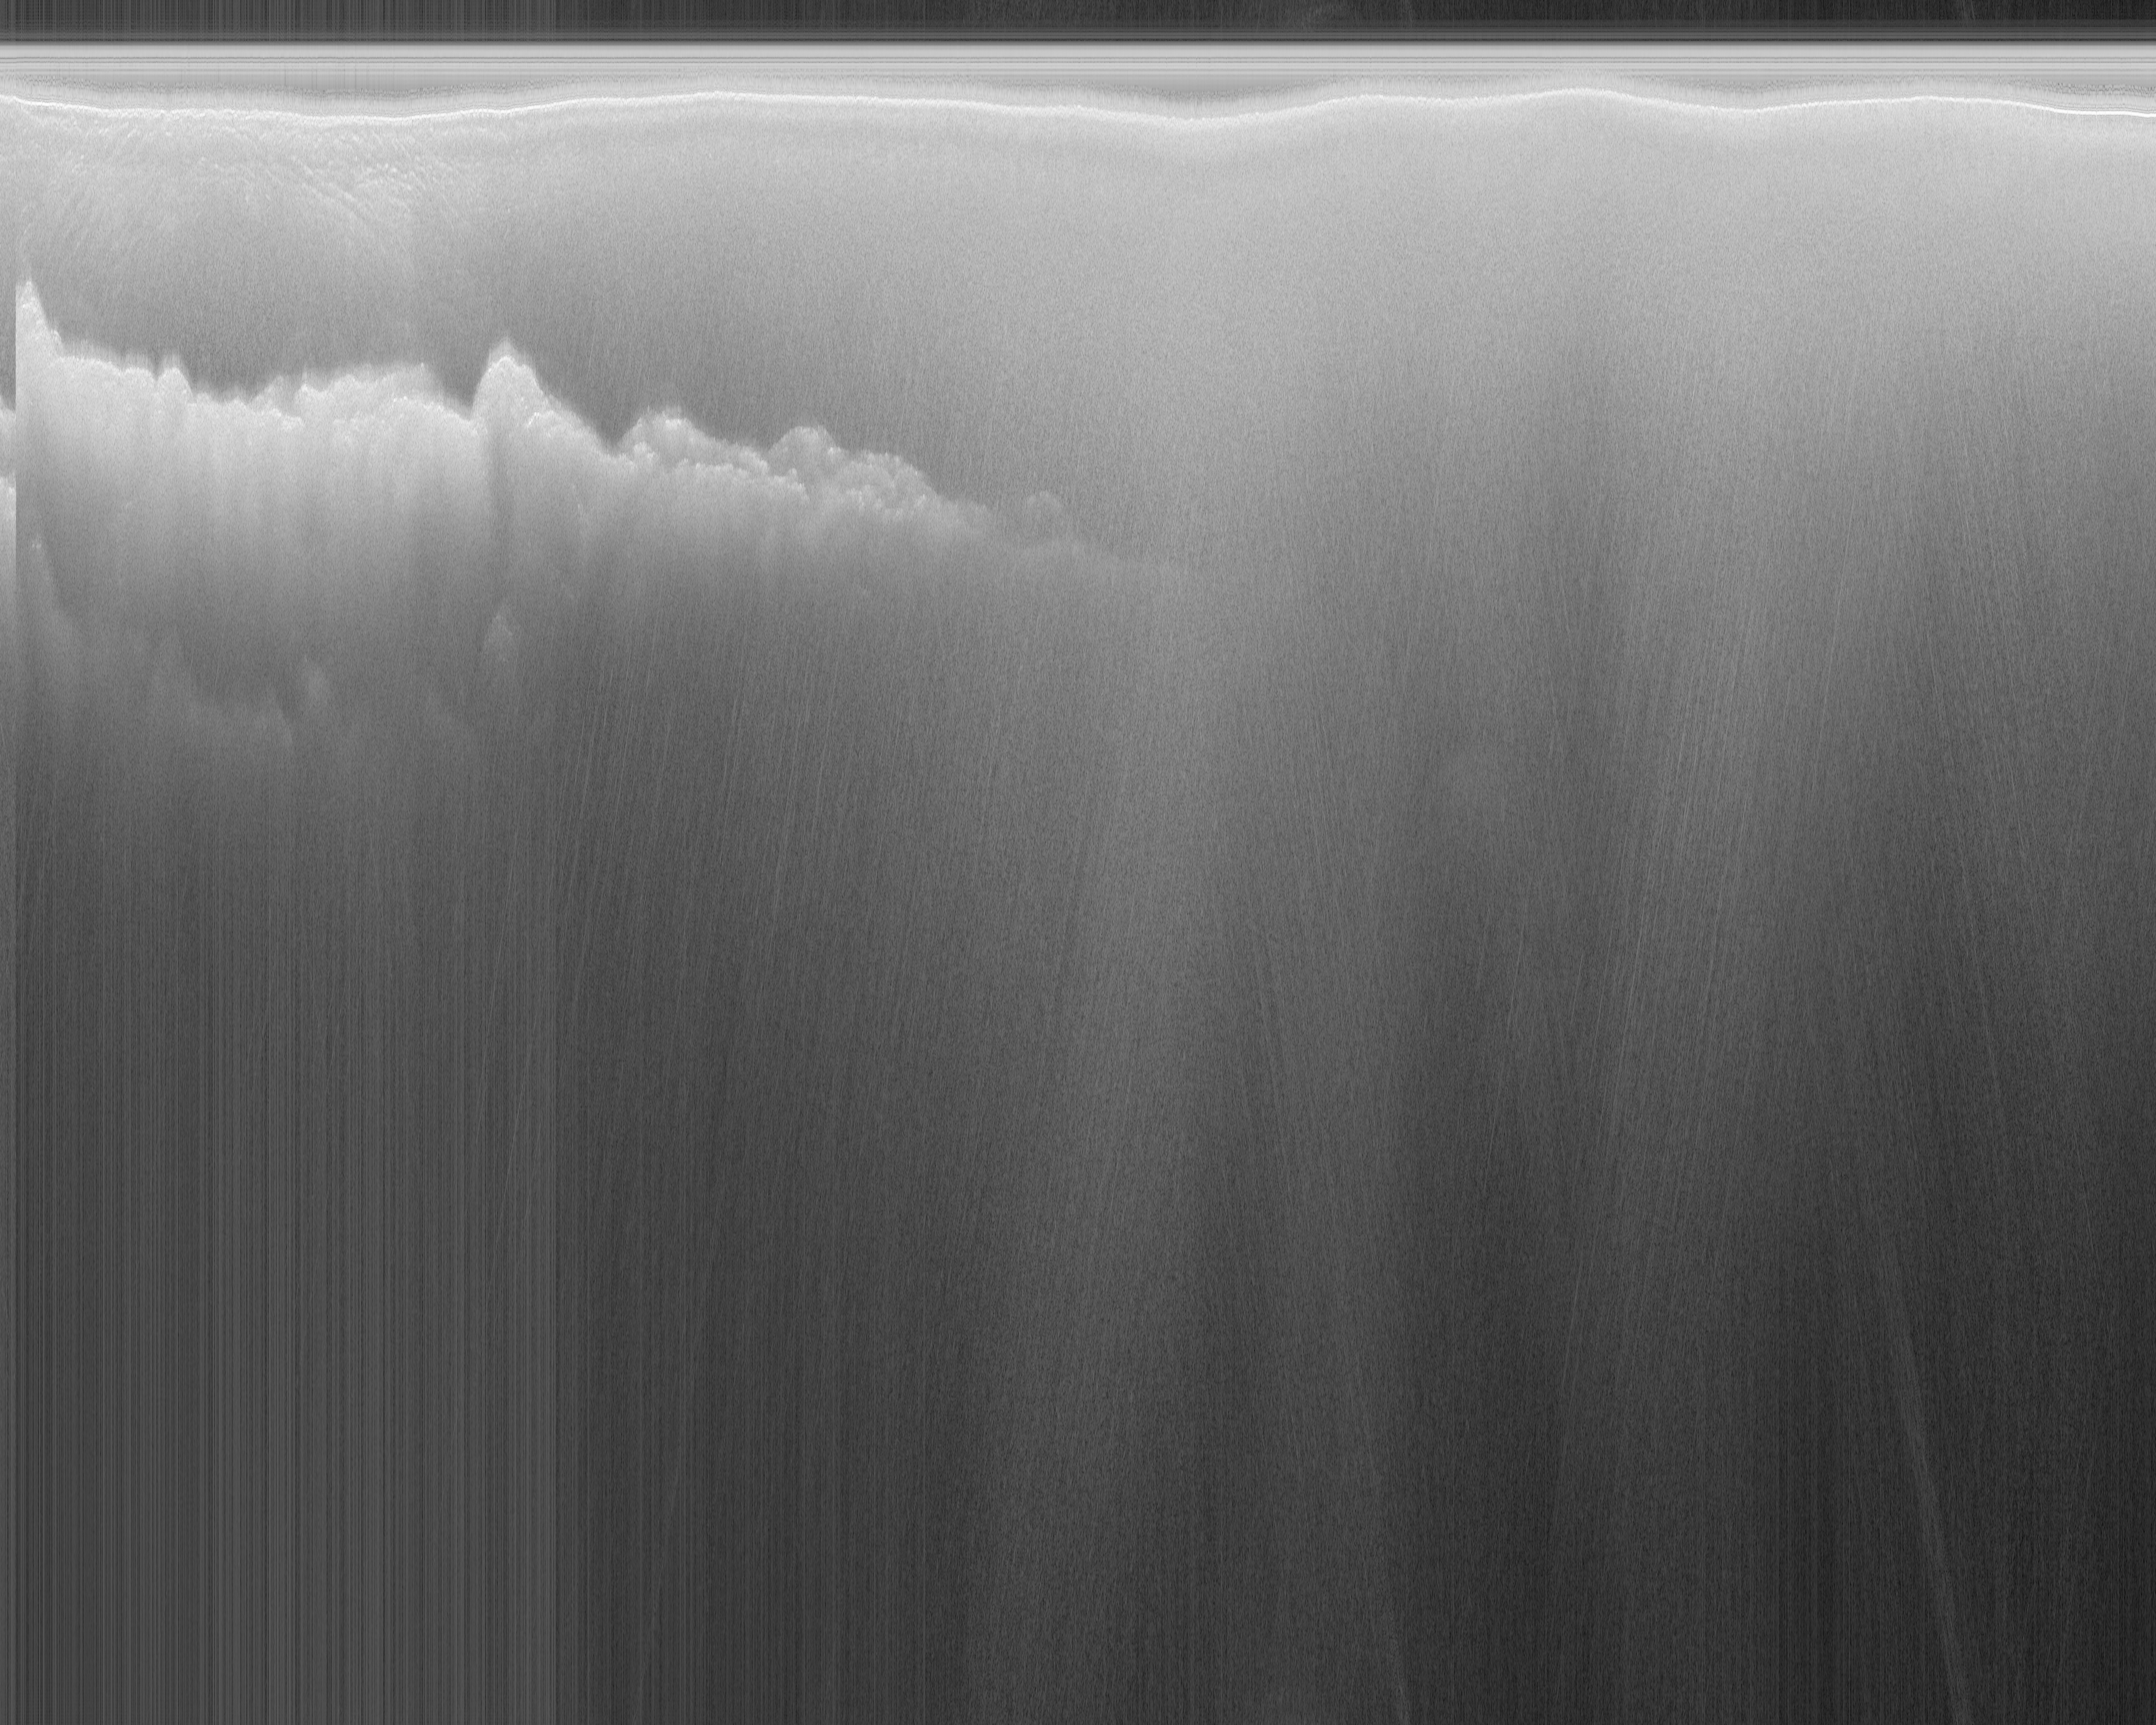

In [9]:
dataset = nc.Dataset('raw_data.nc')
high_gain = np.asarray(dataset['amplitude_high_gain'])
# Converting data readings to pixel brightness
high_gain = 255 * (high_gain-np.amin(high_gain))/(np.amax(high_gain) - np.amin(high_gain))
Image.fromarray(high_gain.T).convert("L")

In the diagram, the x-axis represents horizontal distance travelled and the y-axis represents the time taken for a particular measurement. This can be further manipulated to calculate depth, assuming the speed of the wave is known. As can be seen in the above, diagram, however, there is considerable noise in the data, which can complicate the comprehension and usage of such diagrams.

Currently, there exist filtering techniques to remove noise from radargram data. In order to remove the noise, a fourier transform is applied to the data, and, since the strip noise retains its linear characteristics, a filter can be applied that specifically addresses the frequencies with strip noise. However, this can lead to loss of data fidelity, especially among the higher frequencies data points.

In order to reduce the loss of data fidelity while adequately removing the structured noise, we propose an adaptation of the CycleGAN architecture in order to clean the data. CycleGAN networks have been used previously to remove strip noise from satellite images, as well as to remove structured noise in a variety of other instances. Thus, given the applicability of CycleGANs in addressing structured noise of this variety, we propose to use a modification of the CycleGAN architecture through adapting the loss function and input structure to acommodate echo-sounding data.